[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neverorfrog/whistlenet/blob/main/whistlenet/scripts/main_whistle_colab.ipynb)

In [4]:
import sys

COLAB_RUNTIME = 'google.colab' in sys.modules
if COLAB_RUNTIME:
    !git init
    !git remote add origin https://github.com/neverorfrog/whistlenet.git
    !git pull origin main
    !pip install -q -r requirements.txt
else:
    !pip install -q -r requirements.txt
    !pre-commit install

Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.
From https://github.com/neverorfrog/whistlenet
 * branch            main       -> FETCH_HEAD
Already up to date.


In [5]:
from config import *
import os
import warnings
warnings.filterwarnings("ignore")
import torch
import numpy as np
from whistlenet.core.utils import project_root

config_path = os.path.join(project_root(), "config","whistle_config.yaml")
config: Config = load_config(config_path)
torch_config: TorchConfig = config.torch
dataset_config: DatasetConfig = config.dataset
trainer_config: TrainerConfig = config.trainer
baseline_config: BaselineConfig = config.baseline
whistlenet_config: WhistlenetConfig = config.whistlenet
torch.manual_seed(torch_config.seed)
np.random.seed(torch_config.seed)

Retrieving folder contents


Processing file 16AYpKThc9EEL135p9XvVeTKoUvsvrClw test_data.dat
Processing file 1CrWF7ieQunHWCWMzX_jGp1f3MV3oNnFV train_data.dat
Processing file 1nJEXf5wtxUVFzQQo9zrKSYtgdKt7zGmG val_data.dat


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=16AYpKThc9EEL135p9XvVeTKoUvsvrClw
From (redirected): https://drive.google.com/uc?id=16AYpKThc9EEL135p9XvVeTKoUvsvrClw&confirm=t&uuid=d096b18a-ffa3-45bf-911b-e5dbb07ac53e
To: /content/data/whistle/saved/naodevils/test_data.dat
100%|██████████| 901M/901M [00:11<00:00, 81.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1CrWF7ieQunHWCWMzX_jGp1f3MV3oNnFV
From (redirected): https://drive.google.com/uc?id=1CrWF7ieQunHWCWMzX_jGp1f3MV3oNnFV&confirm=t&uuid=027dd149-50af-4d75-b593-e501c122946d
To: /content/data/whistle/saved/naodevils/train_data.dat
100%|██████████| 3.00G/3.00G [00:40<00:00, 74.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1nJEXf5wtxUVFzQQo9zrKSYtgdKt7zGmG
From (redirected): https://drive.google.com/uc?id=1nJEXf5wtxUVFzQQo9zrKSYtgdKt7zGmG&confirm=t&uuid=38c4b4f1-2f29-49

DATA LOADED!

N Examples: 490053
N Classes: 2
Classes: [0. 1.]
 - Class 0: 273375 (55.784782462305095)
 - Class 1: 216678 (44.2152175376949)


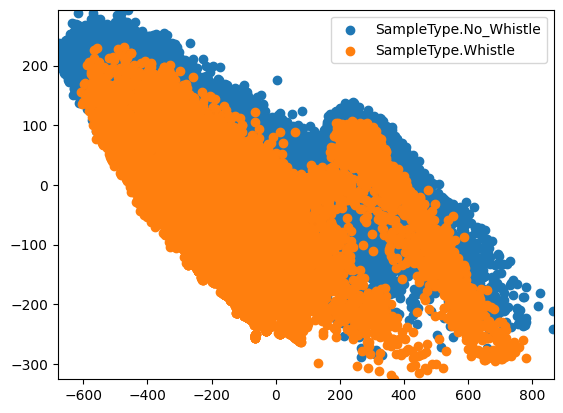

In [6]:
from whistlenet.data import WhistleDataset
from whistlenet.core.utils import plot, NUM_FREQS
from whistlenet.core.utils.audio import SampleType
import gdown

download_path = os.path.join(dataset_config.download_folder, dataset_config.name)
gdown.download_folder(
   dataset_config.drive_url, output=download_path
)

dataset = WhistleDataset(dataset_config)
dataset.summarize()
reshaped = dataset.train_data.reshape((dataset.train_data.data.shape[0], NUM_FREQS))
plot(reshaped, dataset.train_data.labels, SampleType)

In [7]:
from whistlenet.models import WhistleNet, Baseline
from whistlenet.core import LightningTrainer

model = WhistleNet(in_channels=1, out_channels=1, config=whistlenet_config)
# model = Baseline(config=baseline_config)
trainer = LightningTrainer(trainer_config)
trainer.fit(model,dataset)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name            | Type              | Params | Mode 
---------------------------------------------------------------
0  | train_f1        | BinaryF1Score     | 0      | train
1  | train_precision | BinaryPrecision   | 0      | train
2  | train_recall    | BinaryRecall      | 0      | train
3  | train_accuracy  | BinaryAccuracy    | 0      | train
4  | val_f1          | BinaryF1Score     | 0      | train


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved. New best score: 0.314
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved. New best score: 0.314


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.117 >= min_delta = 1e-06. New best score: 0.197
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.117 >= min_delta = 1e-06. New best score: 0.197


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.059 >= min_delta = 1e-06. New best score: 0.138
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.059 >= min_delta = 1e-06. New best score: 0.138


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.049 >= min_delta = 1e-06. New best score: 0.090
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.049 >= min_delta = 1e-06. New best score: 0.090


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.020 >= min_delta = 1e-06. New best score: 0.070
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.020 >= min_delta = 1e-06. New best score: 0.070


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.012 >= min_delta = 1e-06. New best score: 0.058
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.012 >= min_delta = 1e-06. New best score: 0.058


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.008 >= min_delta = 1e-06. New best score: 0.049
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.008 >= min_delta = 1e-06. New best score: 0.049


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.007 >= min_delta = 1e-06. New best score: 0.043
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.007 >= min_delta = 1e-06. New best score: 0.043


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.005 >= min_delta = 1e-06. New best score: 0.038
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.005 >= min_delta = 1e-06. New best score: 0.038


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.003 >= min_delta = 1e-06. New best score: 0.035
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.003 >= min_delta = 1e-06. New best score: 0.035


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.002 >= min_delta = 1e-06. New best score: 0.033
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 1e-06. New best score: 0.033


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.001 >= min_delta = 1e-06. New best score: 0.032
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 1e-06. New best score: 0.032


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.002 >= min_delta = 1e-06. New best score: 0.029
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 1e-06. New best score: 0.029


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.000 >= min_delta = 1e-06. New best score: 0.029
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 1e-06. New best score: 0.029


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.000 >= min_delta = 1e-06. New best score: 0.029
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 1e-06. New best score: 0.029


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.000 >= min_delta = 1e-06. New best score: 0.029
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 1e-06. New best score: 0.029


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.001 >= min_delta = 1e-06. New best score: 0.028
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 1e-06. New best score: 0.028


Model saved to ckpt/ckconv/ckconv


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.002 >= min_delta = 1e-06. New best score: 0.027
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 1e-06. New best score: 0.027
INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Model saved to ckpt/ckconv/ckconv
